In [ ]:
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import os
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/A_stat_data_112.csv")
df

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
0,5,05/06 虎姑婆【多元文化教育－傳說故事】（初階）,易,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-8373966078912715601,8154604467375388289
1,5,05/06 二郎【多元文化教育－傳說故事】（初階）,中,文學,連續,112,112-2,Mon May 06 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,3516683932418412104,3762301478342295221
2,6,05/09 蚩尤【多元文化教育－傳說故事】（初階）,難,人物,連續,112,112-2,Thu May 09 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-65799051578279613,4652807748946159405
3,5,05/13 狗狗吃便便【環境教育－動物奇聞】（初階）,中,生活知識,非連續,112,112-2,Mon May 13 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-6293485111595748020,240621445882253268
4,6,05/16 白蟻跟你想像的不一樣！【環境教育－動物奇聞】（初階）,易,自然科學,連續＋圖表,112,112-2,Thu May 16 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,4998280410504838977,-3340858198738005072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909954,8,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,5090607127449525741,703618323232836566
1909955,8,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,1122720388891184818,8809938774431070893
1909956,8,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-3633088233029289359,703618323232836566
1909957,8,4月特別任務－【SDGs 議題】（中階）,NaN,NaN,NaN,112,112-2,Mon Apr 22 08:00:00 UTC 2024,已派發任務,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,-3198336096824660439,-371611706378504607


In [ ]:
for i in df:
    print(i)

grade
mission_name
mission_difficulty
mission_field
mission_type
mission_semester_year
mission_semester
mission_datetime_utc8
mission_status
is_completed
completed_at_utc8
correct_rate
answer_duration_sec
mission_answer_count
content_indicator_correct_rate
comprehensive_indicator_correct_rate
explanation_indicator_correct_rate
extraction_indicator_correct_rate
form_indicator_correct_rate
first_correct_rate
user_id
mission_id


In [ ]:
df.dropna(subset=["mission_difficulty"], inplace=True)
df.dropna(subset=["first_correct_rate"], inplace=True)
df

,grade,mission_name,mission_difficulty,mission_field,mission_type,mission_semester_year,mission_semester,mission_datetime_utc8,mission_status,is_completed,...,answer_duration_sec,mission_answer_count,content_indicator_correct_rate,comprehensive_indicator_correct_rate,explanation_indicator_correct_rate,extraction_indicator_correct_rate,form_indicator_correct_rate,first_correct_rate,user_id,mission_id
10,5,05/23 一起來看臺灣芒果【多元文化教育－異國美食】（初階）,易,生活知識,連續＋圖表,112,112-2,Thu May 23 08:00:00 UTC 2024,完成任務,1,...,10.0,4,NaN,0.000000,0.0,0.0,NaN,0.0,3381812929067740697,8497080254375325300
11,5,05/27 無限產乳的牛【生命教育－食物奧秘】（初階）,中,議題,連續＋圖表,112,112-2,Mon May 27 08:00:00 UTC 2024,完成任務,1,...,31.0,5,0.0,0.333333,1.0,NaN,NaN,0.4,3381812929067740697,-1529236269228583927
40,5,06/24 被誤會的塑膠袋？【能源教育－環境保育】（初階）,難,議題,連續,112,112-2,Mon Jun 24 08:00:00 UTC 2024,完成任務,1,...,15.0,4,NaN,0.000000,0.0,0.5,NaN,0.2,3516683932418412104,325126197002900849
64,7,09/11 工讀生的勞保與健保【人權教育－勞動權益】（中階）,難,生活知識,連續＋圖表,112,112-1,Mon Sep 11 08:00:00 UTC 2023,完成任務,1,...,6.0,2,NaN,0.333333,0.0,0.0,NaN,0.2,3034784768844041174,-7544460018076597178
65,7,09/11 工讀生的勞保與健保【人權教育－勞動權益】（中階）,難,生活知識,連續＋圖表,112,112-1,Mon Sep 11 08:00:00 UTC 2023,完成任務,1,...,11.0,4,NaN,0.333333,0.0,1.0,NaN,0.4,8513761052470104222,-7544460018076597178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909905,7,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,完成任務,1,...,8.0,2,NaN,0.333333,NaN,0.0,NaN,0.2,5544869316161769011,8809938774431070893
1909909,7,04/22 動物園該存在嗎？【環境教育－動物保育】（中階）,難,議題,非連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,完成任務,1,...,15.0,2,0.0,0.000000,0.0,NaN,NaN,0.0,-1161138445532532382,703618323232836566
1909910,7,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,暫停任務,0,...,NaN,3,NaN,NaN,NaN,NaN,NaN,0.2,-467392198011316237,8809938774431070893
1909913,7,04/22 人與鼠的戰爭【環境教育－動物保育】（中階）,易,世界櫥窗,連續,112,112-2,Mon Apr 22 08:00:00 UTC 2024,完成任務,1,...,6.0,2,NaN,0.333333,NaN,0.0,NaN,0.2,804447241632728037,8809938774431070893


anova分析

In [ ]:
model = ols('first_correct_rate ~ C(mission_difficulty)', data = df).fit()
anova_table = sm.stats.anova_lm(model, typ = 2)

#輸出
print(anova_table)

                             sum_sq        df           F         PR(>F)
C(mission_difficulty)     69.379374       2.0  340.855445  1.200371e-148
Residual               46235.520160  454303.0         NaN            NaN


In [ ]:
import pandas as pd
from scipy import stats

# 分組，根據 mission_difficulty 列來劃分
group_A = df[df['mission_difficulty'] == '易']['first_correct_rate']
group_B = df[df['mission_difficulty'] == '中']['first_correct_rate']
group_C = df[df['mission_difficulty'] == '難']['first_correct_rate']

# 進行 ANOVA 分析
f_statistic, p_value = stats.f_oneway(group_A, group_B, group_C)

# 顯示結果
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

#解釋
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in first_correct_rate between the groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in first_correct_rate between the groups.")

F-statistic: 340.8554450042061
P-value: 1.2003713636168536e-148
Reject the null hypothesis. There is a significant difference in first_correct_rate between the groups.


**盒狀圖**
Boxplot of mission_difficulty by first_correct_rate

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


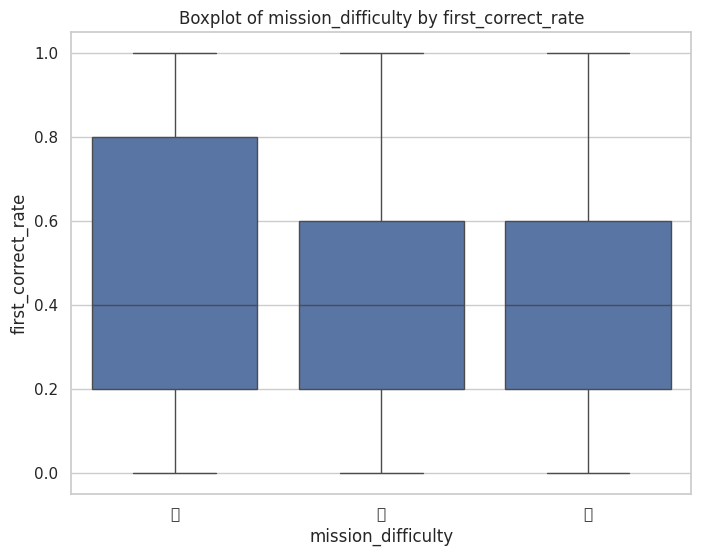

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 設置繪圖風格
sns.set(style="whitegrid")

# 繪製箱型圖
plt.figure(figsize=(8, 6))
sns.boxplot(x='mission_difficulty', y='first_correct_rate', data=df)

# 顯示標題
plt.title("Boxplot of mission_difficulty by first_correct_rate")
plt.show()

**小提琴圖**
Violin Plot of first_correct_rate by mission_difficulty

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


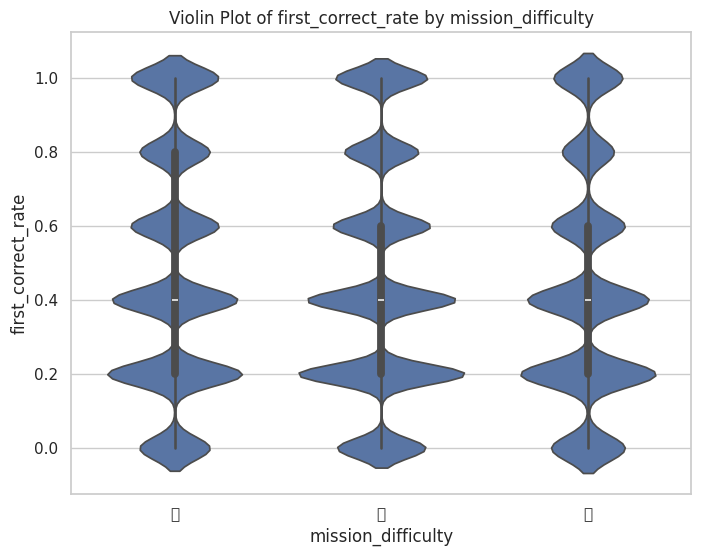

In [ ]:
# 繪製小提琴圖
plt.figure(figsize=(8, 6))
sns.violinplot(x='mission_difficulty', y='first_correct_rate', data=df)

# 顯示標題
plt.title("Violin Plot of first_correct_rate by mission_difficulty")
plt.show()

長條圖

<ipython-input-88-6c871b3393b1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  ax = sns.barplot(x='mission_difficulty', y='first_correct_rate', data=df, ci='sd')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


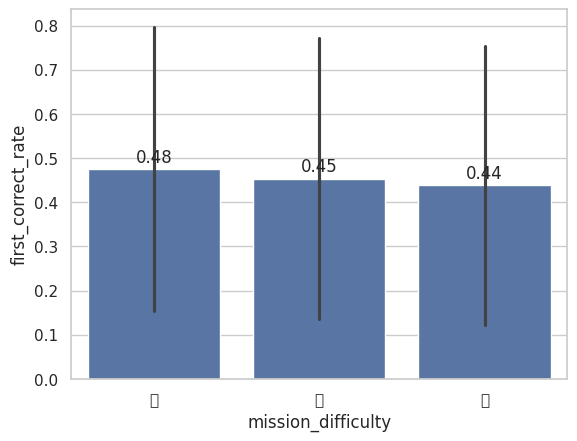

In [ ]:
# 繪製條形圖
ax = sns.barplot(x='mission_difficulty', y='first_correct_rate', data=df, ci='sd')

# 標註每個條形的平均值與標準差
for p in ax.patches:
    # 取得每個條形的高度（即平均值）
    height = p.get_height()

    # 計算標準差
    x_pos = p.get_x() + p.get_width() / 2  # x 位置（條形中間）

    # 標註平均值和標準差
    ax.annotate(f'{height:.2f}', (x_pos, height), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()

In [ ]:
print(mean_first_correct_rate.index)
print(mean_first_correct_rate.values)
print(mean_first_correct_rate)

Index(['中', '易', '難'], dtype='object', name='mission_difficulty')
[0.45347204754076975 0.47508006578372775 0.4385871879766704]
mission_difficulty
中    0.453472
易     0.47508
難    0.438587
Name: first_correct_rate, dtype: object


點圖

<ipython-input-90-43835a69faeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='mission_difficulty', y='first_correct_rate', data=df, jitter=True, palette='Set2')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38627 (\N{CJK UNIFIED IDEOGRAPH-96E3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


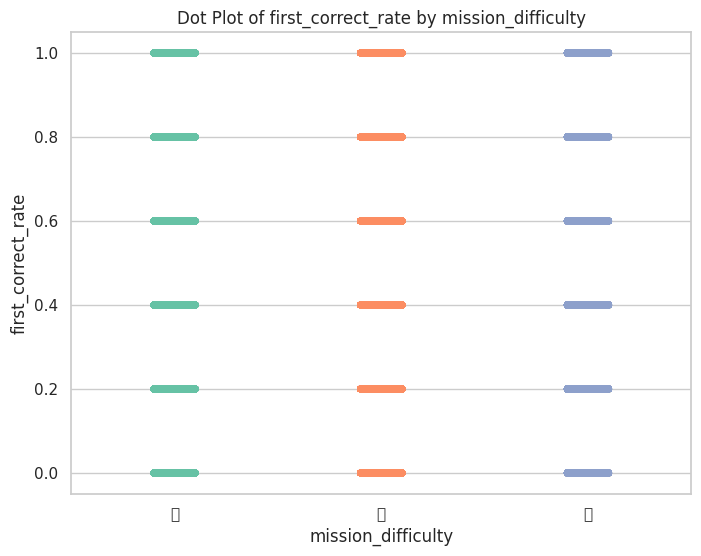

In [ ]:
# 繪製點圖
plt.figure(figsize=(8, 6))
sns.stripplot(x='mission_difficulty', y='first_correct_rate', data=df, jitter=True, palette='Set2')

# 顯示標題
plt.title("Dot Plot of first_correct_rate by mission_difficulty")
plt.show()